# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
# # env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux/Reacher.x86_64')
# # env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_v1/Reacher.x86_64')
# # env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_OneAgent/Reacher_Linux/Reacher.x86_64')
# # env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_NoVis/Reacher.x86_64')
# env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_NoVis_OneAgent/Reacher_Linux_NoVis/Reacher.x86_64')
env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.3899999912828207


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
# Testing the train mode
env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
state = env_info.vector_observations[0]                  # get the current state (for each agent)
#scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    action = np.random.randn(num_agents, action_size) # select an action (for each agent)
    #print(action)
    action = np.clip(action, -1, 1)                  # all actions between -1 and 1
    #print(action)
    env_info = env.step(action)[brain_name]           # send all actions to tne environment
    next_state = env_info.vector_observations[0]         # get next state (for each agent)
    reward = env_info.rewards[0]                         # get reward (for each agent)
    done = env_info.local_done[0]                        # see if episode finished
    #scores += env_info.rewards                         # update the score (for each agent)
    state = next_state                               # roll over states to next time step
    if done is True:                                  # exit loop if episode finished
        #print(action.shape, reward)
        #print(done)
        break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

## Option 1: Solve the First Version
The task is episodic, and in order to solve the environment, your agent must get an average score of +30 over 100 consecutive episodes.

In [8]:
# Only to test if GPUs are available!
import tensorflow as tf
print('TensorFlow Version: {}'.format(tf.__version__))
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.1
Default GPU Device: 


In [9]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [10]:
print('state size:{}'.format(states.shape), 
      'actions:{}'.format(actions.shape)) 
print('action size:{}'.format(np.max(actions) - np.min(actions)+1))

state size:(1, 33) actions:(1, 4)
action size:1.9598928370030237


In [11]:
env_info.agents, env_info.max_reached, env_info.vector_observations.shape, \
brain.vector_observation_space_size, brain.vector_action_space_size, \
brain.vector_action_space_type, brain.vector_observation_space_type

([922], [True], (1, 33), 33, 4, 'continuous', 'continuous')

In [12]:
# Network parameters
state_size = 33
action_size = 4

In [13]:
# env = gym.make('BipedalWalker-v2')
# env.seed(10)
# agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

In [14]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
total_reward_deque = deque(maxlen=100)
episode_total_rewards = []
for ep in range(1111*2):
    #state = env.reset()
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    state = env_info.vector_observations[0]                  # get the current state (for each agent)
    agent.reset()
    total_reward = 0
    while True:
        action = agent.act(state)
        #next_state, reward, done, _ = env.step(action)
        env_info = env.step(action)[brain_name]           # send all actions to tne environment
        next_state = env_info.vector_observations[0]         # get next state (for each agent)
        reward = env_info.rewards[0]                         # get reward (for each agent)
        done = env_info.local_done[0]                        # see if episode finished
        agent.step(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        if done:
            break 
    total_reward_deque.append(total_reward)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(total_reward_deque))) 
    episode_total_rewards.append([ep, np.mean(total_reward_deque)])
    if np.mean(total_reward_deque) >= 30:
        break
torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

/home/arasdar/miniconda3/envs/env/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 0	Average Score: 4.73
Episode 1	Average Score: 3.57
Episode 2	Average Score: 2.68
Episode 3	Average Score: 3.06
Episode 4	Average Score: 2.84
Episode 5	Average Score: 2.76
Episode 6	Average Score: 2.65
Episode 7	Average Score: 2.70
Episode 8	Average Score: 2.56
Episode 9	Average Score: 2.44
Episode 10	Average Score: 2.31
Episode 11	Average Score: 2.26
Episode 12	Average Score: 2.22
Episode 13	Average Score: 2.19
Episode 14	Average Score: 2.18
Episode 15	Average Score: 2.10
Episode 16	Average Score: 2.20
Episode 17	Average Score: 2.10
Episode 18	Average Score: 2.08
Episode 19	Average Score: 2.06
Episode 20	Average Score: 2.09
Episode 21	Average Score: 2.03
Episode 22	Average Score: 2.02
Episode 23	Average Score: 2.08
Episode 24	Average Score: 2.16
Episode 25	Average Score: 2.23
Episode 26	Average Score: 2.30
Episode 27	Average Score: 2.24
Episode 28	Average Score: 2.27
Episode 29	Average Score: 2.43
Episode 30	Average Score: 2.39
Episode 31	Average Score: 2.45
Episode 32	Average

Episode 260	Average Score: 2.75
Episode 261	Average Score: 2.73
Episode 262	Average Score: 2.75
Episode 263	Average Score: 2.71
Episode 264	Average Score: 2.72
Episode 265	Average Score: 2.74
Episode 266	Average Score: 2.70
Episode 267	Average Score: 2.70
Episode 268	Average Score: 2.71
Episode 269	Average Score: 2.71
Episode 270	Average Score: 2.74
Episode 271	Average Score: 2.74
Episode 272	Average Score: 2.72
Episode 273	Average Score: 2.72
Episode 274	Average Score: 2.79
Episode 275	Average Score: 2.80
Episode 276	Average Score: 2.81
Episode 277	Average Score: 2.80
Episode 278	Average Score: 2.81
Episode 279	Average Score: 2.85
Episode 280	Average Score: 2.85
Episode 281	Average Score: 2.80
Episode 282	Average Score: 2.77
Episode 283	Average Score: 2.78
Episode 284	Average Score: 2.76
Episode 285	Average Score: 2.78
Episode 286	Average Score: 2.76
Episode 287	Average Score: 2.79
Episode 288	Average Score: 2.79
Episode 289	Average Score: 2.80
Episode 290	Average Score: 2.79
Episode 

Episode 517	Average Score: 4.58
Episode 518	Average Score: 4.53
Episode 519	Average Score: 4.56
Episode 520	Average Score: 4.55
Episode 521	Average Score: 4.56
Episode 522	Average Score: 4.55
Episode 523	Average Score: 4.54
Episode 524	Average Score: 4.58
Episode 525	Average Score: 4.64
Episode 526	Average Score: 4.65
Episode 527	Average Score: 4.65
Episode 528	Average Score: 4.61
Episode 529	Average Score: 4.64
Episode 530	Average Score: 4.64
Episode 531	Average Score: 4.62
Episode 532	Average Score: 4.58
Episode 533	Average Score: 4.59
Episode 534	Average Score: 4.61
Episode 535	Average Score: 4.59
Episode 536	Average Score: 4.59
Episode 537	Average Score: 4.60
Episode 538	Average Score: 4.60
Episode 539	Average Score: 4.61
Episode 540	Average Score: 4.63
Episode 541	Average Score: 4.62
Episode 542	Average Score: 4.66
Episode 543	Average Score: 4.68
Episode 544	Average Score: 4.71
Episode 545	Average Score: 4.73
Episode 546	Average Score: 4.75
Episode 547	Average Score: 4.77
Episode 

Episode 774	Average Score: 5.00
Episode 775	Average Score: 4.97
Episode 776	Average Score: 4.97
Episode 777	Average Score: 4.98
Episode 778	Average Score: 4.99
Episode 779	Average Score: 5.00
Episode 780	Average Score: 4.94
Episode 781	Average Score: 4.99
Episode 782	Average Score: 5.00
Episode 783	Average Score: 5.02
Episode 784	Average Score: 5.00
Episode 785	Average Score: 5.01
Episode 786	Average Score: 5.05
Episode 787	Average Score: 5.06
Episode 788	Average Score: 4.99
Episode 789	Average Score: 5.00
Episode 790	Average Score: 5.00
Episode 791	Average Score: 5.03
Episode 792	Average Score: 5.10
Episode 793	Average Score: 5.12
Episode 794	Average Score: 5.10
Episode 795	Average Score: 5.11
Episode 796	Average Score: 5.16
Episode 797	Average Score: 5.21
Episode 798	Average Score: 5.23
Episode 799	Average Score: 5.26
Episode 800	Average Score: 5.25
Episode 801	Average Score: 5.30
Episode 802	Average Score: 5.28
Episode 803	Average Score: 5.27
Episode 804	Average Score: 5.31
Episode 

Episode 1030	Average Score: 6.40
Episode 1031	Average Score: 6.45
Episode 1032	Average Score: 6.49
Episode 1033	Average Score: 6.50
Episode 1034	Average Score: 6.45
Episode 1035	Average Score: 6.46
Episode 1036	Average Score: 6.46
Episode 1037	Average Score: 6.46
Episode 1038	Average Score: 6.43
Episode 1039	Average Score: 6.43
Episode 1040	Average Score: 6.49
Episode 1041	Average Score: 6.49
Episode 1042	Average Score: 6.49
Episode 1043	Average Score: 6.47
Episode 1044	Average Score: 6.48
Episode 1045	Average Score: 6.51
Episode 1046	Average Score: 6.53
Episode 1047	Average Score: 6.52
Episode 1048	Average Score: 6.46
Episode 1049	Average Score: 6.45
Episode 1050	Average Score: 6.46
Episode 1051	Average Score: 6.46
Episode 1052	Average Score: 6.44
Episode 1053	Average Score: 6.39
Episode 1054	Average Score: 6.44
Episode 1055	Average Score: 6.48
Episode 1056	Average Score: 6.44
Episode 1057	Average Score: 6.46
Episode 1058	Average Score: 6.50
Episode 1059	Average Score: 6.51
Episode 10

Episode 1279	Average Score: 7.07
Episode 1280	Average Score: 7.10
Episode 1281	Average Score: 7.13
Episode 1282	Average Score: 7.10
Episode 1283	Average Score: 7.12
Episode 1284	Average Score: 7.17
Episode 1285	Average Score: 7.16
Episode 1286	Average Score: 7.13
Episode 1287	Average Score: 7.13
Episode 1288	Average Score: 7.11
Episode 1289	Average Score: 7.16
Episode 1290	Average Score: 7.14
Episode 1291	Average Score: 7.13
Episode 1292	Average Score: 7.16
Episode 1293	Average Score: 7.16
Episode 1294	Average Score: 7.17
Episode 1295	Average Score: 7.12
Episode 1296	Average Score: 7.09
Episode 1297	Average Score: 7.03
Episode 1298	Average Score: 7.07
Episode 1299	Average Score: 7.04
Episode 1300	Average Score: 7.04
Episode 1301	Average Score: 6.98
Episode 1302	Average Score: 6.94
Episode 1303	Average Score: 6.95
Episode 1304	Average Score: 6.93
Episode 1305	Average Score: 6.94
Episode 1306	Average Score: 6.95
Episode 1307	Average Score: 6.90
Episode 1308	Average Score: 6.90
Episode 13

Episode 1528	Average Score: 6.24
Episode 1529	Average Score: 6.21
Episode 1530	Average Score: 6.18
Episode 1531	Average Score: 6.15
Episode 1532	Average Score: 6.15
Episode 1533	Average Score: 6.20
Episode 1534	Average Score: 6.18
Episode 1535	Average Score: 6.18
Episode 1536	Average Score: 6.17
Episode 1537	Average Score: 6.13
Episode 1538	Average Score: 6.08
Episode 1539	Average Score: 6.09
Episode 1540	Average Score: 6.12
Episode 1541	Average Score: 6.13
Episode 1542	Average Score: 6.08
Episode 1543	Average Score: 6.05
Episode 1544	Average Score: 5.99
Episode 1545	Average Score: 5.98
Episode 1546	Average Score: 6.00
Episode 1547	Average Score: 6.01
Episode 1548	Average Score: 5.99
Episode 1549	Average Score: 5.98
Episode 1550	Average Score: 5.95
Episode 1551	Average Score: 5.94
Episode 1552	Average Score: 5.94
Episode 1553	Average Score: 6.17
Episode 1554	Average Score: 6.10
Episode 1555	Average Score: 6.12
Episode 1556	Average Score: 6.11
Episode 1557	Average Score: 6.17
Episode 15

Episode 1777	Average Score: 7.60
Episode 1778	Average Score: 7.63
Episode 1779	Average Score: 7.63
Episode 1780	Average Score: 7.68
Episode 1781	Average Score: 7.66
Episode 1782	Average Score: 7.68
Episode 1783	Average Score: 7.64
Episode 1784	Average Score: 7.62
Episode 1785	Average Score: 7.65
Episode 1786	Average Score: 7.69
Episode 1787	Average Score: 7.75
Episode 1788	Average Score: 7.72
Episode 1789	Average Score: 7.71
Episode 1790	Average Score: 7.73
Episode 1791	Average Score: 7.80
Episode 1792	Average Score: 7.85
Episode 1793	Average Score: 7.85
Episode 1794	Average Score: 7.86
Episode 1795	Average Score: 7.83
Episode 1796	Average Score: 7.85
Episode 1797	Average Score: 7.85
Episode 1798	Average Score: 7.85
Episode 1799	Average Score: 7.87
Episode 1800	Average Score: 7.89
Episode 1801	Average Score: 7.93
Episode 1802	Average Score: 7.98
Episode 1803	Average Score: 8.01
Episode 1804	Average Score: 8.08
Episode 1805	Average Score: 8.10
Episode 1806	Average Score: 8.08
Episode 18

Episode 2026	Average Score: 8.88
Episode 2027	Average Score: 8.98
Episode 2028	Average Score: 9.01
Episode 2029	Average Score: 8.91
Episode 2030	Average Score: 8.97
Episode 2031	Average Score: 8.94
Episode 2032	Average Score: 8.87
Episode 2033	Average Score: 8.80
Episode 2034	Average Score: 8.74
Episode 2035	Average Score: 8.75
Episode 2036	Average Score: 8.67
Episode 2037	Average Score: 8.66
Episode 2038	Average Score: 8.65
Episode 2039	Average Score: 8.60
Episode 2040	Average Score: 8.62
Episode 2041	Average Score: 8.68
Episode 2042	Average Score: 8.62
Episode 2043	Average Score: 8.71
Episode 2044	Average Score: 8.76
Episode 2045	Average Score: 8.70
Episode 2046	Average Score: 8.71
Episode 2047	Average Score: 8.70
Episode 2048	Average Score: 8.69
Episode 2049	Average Score: 8.67
Episode 2050	Average Score: 8.65
Episode 2051	Average Score: 8.61
Episode 2052	Average Score: 8.50
Episode 2053	Average Score: 8.55
Episode 2054	Average Score: 8.60
Episode 2055	Average Score: 8.62
Episode 20

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0, 0.5, 'Total rewards')

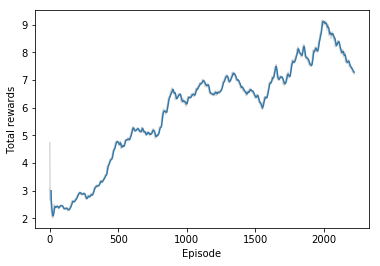

In [16]:
eps, arr = np.array(episode_total_rewards).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

In [17]:
# agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
# agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
# # 1 episode
# state = env.reset()
# agent.reset()
# total_reward = 0
# while True:
#     env.render()
#     action = agent.act(state)
#     state, reward, done, _ = env.step(action)
#     total_reward += reward
#     if done:
#         break
        
# print('total_reward:{}'.format(total_reward))
# env.close()